In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
sectors=["all","residential","commercial","industrial","transportation","other"]
sales = pd.read_csv("Retail_sales_of_electricity.csv")
customers = pd.read_csv("Number_of_customer_accounts.csv")
# sales.shape[0]==customers.shape[0]
file_length=sales.shape[0]

In [14]:
sales_data={}
for sec in sectors:
    begin = sectors.index(sec)+2
    x = range(begin,file_length,7)
    temp = sales.iloc[x]
    temp["state"]=[i[0].strip() for i in temp["description"].str.split(":")]
    temp.drop(axis=1, columns=temp.columns[range(0,3)],inplace=True)
    temp.set_index("state",inplace=True)
    for c in temp.columns:
        temp[c]=pd.to_numeric(temp[c],errors="coerce")
    sales_data[sec]=temp.transpose()

In [15]:
customers_data={}
for sec in sectors:
    begin = sectors.index(sec)+2
    x = range(begin,file_length,7)
    temp = customers.iloc[x]
    temp["state"]=[i[0].strip() for i in temp["description"].str.split(":")]
    temp.drop(axis=1, columns=temp.columns[range(0,3)],inplace=True)
    temp.set_index("state",inplace=True)
    for c in temp.columns:
        temp[c]=pd.to_numeric(temp[c],errors="coerce")
    customers_data[sec]=temp.transpose()

In [16]:
average_consumption={}
for sec in sectors:
    average_consumption[sec]=sales_data[sec]/customers_data[sec]

<AxesSubplot:>

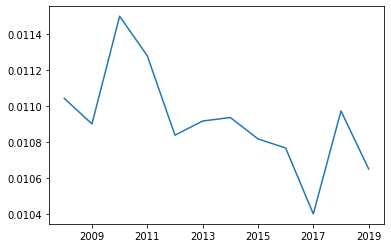

In [20]:
average_consumption[sectors[1]]['United States'].plot()